In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Exact Energies obtained from QMC 
exactE_4     = -0.4534132086591546
exactE_8     = -0.40518005298872917
exactE_12    = -0.3884864748124427
exactE_16    = -0.380514770608724

# Read in Data

### Demonstrating expressibility (QMC training only, using fulld dataset)

In [2]:
E_QMC_16_8_fulldata = np.loadtxt("experiments/16x16/nh8/QMC_Full/E_QMC_16_8_fulldata_smlr.dat")
E_QMC_16_16_fulldata = np.loadtxt("experiments/16x16/nh16/QMC_Full/E_QMC_16_16_fulldata_smlr.dat")
E_QMC_16_24_fulldata = np.loadtxt("experiments/16x16/nh24/QMC_Full/E_QMC_16_24_fulldata_smlr.dat")
E_QMC_16_32_fulldata = np.loadtxt("experiments/16x16/nh32/QMC_Full/E_QMC_16_32_fulldata_smlr.dat")
E_QMC_16_40_fulldata = np.loadtxt("experiments/16x16/nh40/QMC_Full/E_QMC_16_40_fulldata_smlr.dat")

E_QMC_16_8_smaller = np.loadtxt("experiments/16x16/nh8/QMC_Full/E_QMC_16_8_fulldata_00001.dat")
E_QMC_16_16_smaller = np.loadtxt("experiments/16x16/nh16/QMC_Full/E_QMC_16_16_fulldata_00001.dat")
E_QMC_16_24_smaller = np.loadtxt("experiments/16x16/nh24/QMC_Full/E_QMC_16_24_fulldata_00001.dat")
E_QMC_16_32_smaller = np.loadtxt("experiments/16x16/nh32/QMC_Full/E_QMC_16_32_fulldata_00001.dat")
E_QMC_16_40_smaller = np.loadtxt("experiments/16x16/nh40/QMC_Full/E_QMC_16_40_fulldata_00001.dat")

In [3]:
print(len(E_QMC_16_8_fulldata))
print(len(E_QMC_16_16_fulldata))
print(len(E_QMC_16_24_fulldata))
print(len(E_QMC_16_32_fulldata))
print(len(E_QMC_16_40_fulldata))

print("smaller lr")
print(len(E_QMC_16_8_smaller))
print(len(E_QMC_16_16_smaller))
print(len(E_QMC_16_24_smaller))
print(len(E_QMC_16_32_smaller))
print(len(E_QMC_16_40_smaller))

1471
1468
1432
1447
1070
smaller lr
2676
2639
2695
2781
2708


^ The smaller learning rate doesnt show great convergence, but there are jumps in the data for the larger learning rate... for now I will continue running the smaller learning rate but we may choose an intermediate learning rate value

### Comparing optimization methods (nh = 24, 32, 40)

In [4]:
E_QMC_16_24 = np.loadtxt("experiments/16x16/nh24/QMC_VMC/E_QMC_16_24.dat")
E_VMC_16_24 = np.loadtxt("experiments/16x16/nh24/VMC_Full/E_VMC_16_24.dat")

E_QMC_16_32 = np.loadtxt("experiments/16x16/nh32/QMC_VMC/E_QMC_16_32.dat")
E_VMC_16_32 = np.loadtxt("experiments/16x16/nh32/VMC_Full/E_VMC_16_32.dat")

E_QMC_16_40 = np.loadtxt("experiments/16x16/nh40/QMC_VMC/E_QMC_16_40.dat")
E_VMC_16_40 = np.loadtxt("experiments/16x16/nh40/VMC_Full/E_VMC_16_40.dat")

E_VMC_final_16_32 = np.loadtxt("experiments/16x16/nh32/VMC_Full/E_VMC_Final_16_32.dat")


In [5]:
print('QMC run lengths:')
print(len(E_QMC_16_24))
print(len(E_QMC_16_32))
print(len(E_QMC_16_40))
print('VMC run lengths:')
print(len(E_VMC_16_24))
print(len(E_VMC_16_32))
print(len(E_VMC_16_40))
print('not messed up nh = 32 run')
print(len(E_VMC_final_16_32))

QMC run lengths:
3000
3000
2000
VMC run lengths:
10000
10000
10000
not messed up nh = 32 run
10006


^ Havent finished running the VMC runs for nh = 32 (will keep running for 10,000+ steps). Not sure if the nh = 32 run is actually messued up or not.. so running a new version just in case (since we are waiting on other data as well)

### Hybrid method runs

In [6]:
QMC200_VMC = np.loadtxt("experiments/16x16/nh32/QMC_VMC/E_QMC200_VMC_16_32.dat")
QMC400_VMC = np.loadtxt("experiments/16x16/nh32/QMC_VMC/E_QMC400_VMC_16_32.dat")
QMC600_VMC = np.loadtxt("experiments/16x16/nh32/QMC_VMC/E_QMC600_VMC_16_32.dat")
QMC800_VMC = np.loadtxt("experiments/16x16/nh32/QMC_VMC/E_QMC800_VMC_16_32.dat")
QMC1000_VMC = np.loadtxt("experiments/16x16/nh32/QMC_VMC/E_QMC1000_VMC_16_32.dat")
QMC1200_VMC = np.loadtxt("experiments/16x16/nh32/QMC_VMC/E_QMC1200_VMC_16_32.dat")
QMC1400_VMC = np.loadtxt("experiments/16x16/nh32/QMC_VMC/E_QMC1400_VMC_16_32.dat")
QMC1600_VMC = np.loadtxt("experiments/16x16/nh32/QMC_VMC/E_QMC1600_VMC_16_32.dat")
QMC1800_VMC = np.loadtxt("experiments/16x16/nh32/QMC_VMC/E_QMC1800_VMC_16_32.dat")
QMC2000_VMC = np.loadtxt("experiments/16x16/nh32/QMC_VMC/E_QMC2000_VMC_16_32.dat")

In [7]:
print(len(QMC200_VMC),', need ',10000-len(QMC200_VMC))
print(len(QMC400_VMC),', need ',10000-len(QMC400_VMC))
print(len(QMC600_VMC),', need ',10000-len(QMC600_VMC))
print(len(QMC800_VMC),', need ',10000-len(QMC800_VMC))
print(len(QMC1000_VMC),', need ',10000-len(QMC1000_VMC))
print(len(QMC1200_VMC),', need ',10000-len(QMC1200_VMC))
print(len(QMC1400_VMC),', need ',10000-len(QMC1400_VMC))
print(len(QMC1600_VMC),', need ',10000-len(QMC1600_VMC))
print(len(QMC1800_VMC),', need ',10000-len(QMC1800_VMC))
print(len(QMC2000_VMC),', need ',10000-len(QMC2000_VMC))

10000 , need  0
10000 , need  0
10000 , need  0
10000 , need  0
10000 , need  0
10000 , need  0
10000 , need  0
10000 , need  0
10000 , need  0
10000 , need  0


^ Will run to 10000 steps... 

### Using more samples to estimate local energy during VMC training

In [8]:
E_VMC_12_24_500 = np.loadtxt("experiments/12x12/nh24/VMC_Full/E_VMC_12_24_500.dat")
E_VMC_12_24_1000 = np.loadtxt("experiments/12x12/nh24/VMC_Full/E_VMC_12_24_1000.dat")
E_VMC_12_24_2000 = np.loadtxt("experiments/12x12/nh24/VMC_Full/E_VMC_12_24_2000.dat")

E_QMC_12_24 = np.loadtxt("experiments/12x12/nh24/QMC_Full/E_QMC_12_24.dat")

E_QMC_VMC_12_24_500 = np.loadtxt("experiments/12x12/nh24/QMC_VMC/E_QMC_VMC_12_24_500.dat")
E_QMC_VMC_12_24_1000 = np.loadtxt("experiments/12x12/nh24/QMC_VMC/E_QMC_VMC_12_24_1000.dat")
E_QMC_VMC_12_24_2000 = np.loadtxt("experiments/12x12/nh24/QMC_VMC/E_QMC_VMC_12_24_2000.dat")
E_QMC_VMC_12_24_5000 = np.loadtxt("experiments/12x12/nh24/QMC_VMC/E_QMC_VMC_12_24_5000.dat")

In [9]:
print(len(E_VMC_12_24_500))
print(len(E_VMC_12_24_1000))
print(len(E_VMC_12_24_2000))
print(len(E_QMC_12_24))
print(len(E_QMC_VMC_12_24_500))
print(len(E_QMC_VMC_12_24_1000))
print(len(E_QMC_VMC_12_24_2000))
print(len(E_QMC_VMC_12_24_5000))

10000
10000
10000
4000
10000
10000
10000
10000


# Plotting Functions

### Energy Plotting Funciton (for QMC training with full dataset)

In [8]:
def QMCPlot(N,lr,exactE,qmc_8,qmc_16,qmc_24,qmc_32,qmc_40,xlim,ylim):

    fig = plt.figure(1,figsize=(6,4), dpi=120, facecolor='w', edgecolor='k')
    
    plt.plot(qmc_8,marker='o',markersize=1,linewidth=0.0,markevery=1,label="nh = 8")
    plt.plot(qmc_16,marker='o',markersize=1,linewidth=0.0,markevery=1,label="nh = 16")
    plt.plot(qmc_24,marker='o',markersize=1,linewidth=0.0,markevery=1,label="nh = 24")
    plt.plot(qmc_32,marker='o',markersize=1,linewidth=0.0,markevery=1,label="nh = 32")
    plt.plot(qmc_40,marker='o',markersize=1,linewidth=0.0,markevery=1,label="nh = 40")

    plt.hlines(exactE,0, 5000 ,linestyle="--",label="Exact")

    plt.xlabel("Step",fontsize=15)
    plt.ylabel("$\\langle H \\rangle$",fontsize=20)
    plt.title("{} x {} Lattice, Learning Rate = {}".format(N,N,lr))
    plt.legend(loc="best")
    plt.xlim(xlim[0],xlim[1])
    plt.ylim(ylim[0],ylim[1])

    plt.show()

### Energy Plotting Function (for comparing VMC & QMC)

In [11]:
def PlotE(N,lr,nh,exact_energy,qmc_energy,vmc_energy,qmc_vmc_energy,xlim,ylim):

    fig = plt.figure(1,figsize=(6,4), dpi=120, facecolor='w', edgecolor='k')
 
    plt.plot(vmc_energy,marker='o',markersize=1,linewidth=0.0,markevery=1,label="VMC")
    plt.plot(qmc_energy,marker='s',markersize=1,linewidth=0.0,markevery=1,label="QMC")
    #plt.plot(qmc_vmc_energy,marker='^',markersize=1,linewidth=0.0,markevery=1,label="950 epochs QMC, 5050 epochs QMC")

    plt.hlines(exact_energy,0, 10000 ,linestyle="--",label="Exact")  
    #plt.vlines(200,-0.4,-0.1,linestyle="--",color='r',label="QMC VMC transition")


    plt.xlabel("Step",fontsize=15)
    plt.ylabel("$\\langle H \\rangle$",fontsize=20)
    plt.title("{} x {} Lattice, Learning Rate = {}, NH = {}".format(N,N,lr,nh))
    plt.legend(loc="best")
    
    plt.xlim(xlim[0],xlim[1])
    plt.ylim(ylim[0],ylim[1])

    plt.show()

### Energy Plotting Function (Hybrid Method)

In [12]:
def PlotE_hybrid(N,lr,nh,exact_energy,h1,h2,h3,h4,h5,h6,h7,h8,h9,h10,qmc,vmc,xlim,ylim):

    fig = plt.figure(1,figsize=(6,4), dpi=120, facecolor='w', edgecolor='k')

    plt.plot(vmc,marker='o',markersize=1,linewidth=0.0,markevery=1,label="VMC")
    plt.plot(qmc,marker='o',markersize=1,linewidth=0.0,markevery=1,label="QMC")

    plt.plot(h1,marker='o',markersize=1,linewidth=0.0,markevery=1,label="cutoff = 200")
    plt.plot(h2,marker='o',markersize=1,linewidth=0.0,markevery=1,label="cutoff = 400")
    plt.plot(h3,marker='o',markersize=1,linewidth=0.0,markevery=1,label="cutoff = 600")
    plt.plot(h4,marker='o',markersize=1,linewidth=0.0,markevery=1,label="cutoff = 800")
    plt.plot(h5,marker='o',markersize=1,linewidth=0.0,markevery=1,label="cutoff = 1000")
    plt.plot(h6,marker='o',markersize=1,linewidth=0.0,markevery=1,label="cutoff = 1200")
    plt.plot(h7,marker='o',markersize=1,linewidth=0.0,markevery=1,label="cutoff = 1400")
    plt.plot(h8,marker='o',markersize=1,linewidth=0.0,markevery=1,label="cutoff = 1600")
    plt.plot(h9,marker='o',markersize=1,linewidth=0.0,markevery=1,label="cutoff = 1800")
    plt.plot(h10,marker='o',markersize=1,linewidth=0.0,markevery=1,label="cutoff = 2000")
    
    plt.hlines(exact_energy,0, 10000 ,linestyle="--",label="Exact")  

    plt.xlabel("Step",fontsize=15)
    plt.ylabel("$\\langle H \\rangle$",fontsize=20)
    plt.title("{} x {} Lattice, Learning Rate = {}, NH = {}".format(N,N,lr,nh))
    #plt.legend(loc="best")
    
    plt.xlim(xlim[0],xlim[1])
    plt.ylim(ylim[0],ylim[1])

    plt.show()

### Energy plotting function for extra samples experiments

In [13]:
def PlotE_samples(N,lr,nh,exact_energy,qmc,vmc_ns1,vmc_ns2,vmc_ns3,h_ns1,h_ns2,h_ns3,xlim,ylim):

    fig = plt.figure(1,figsize=(6,4), dpi=120, facecolor='w', edgecolor='k')
 
    plt.plot(qmc,marker = 'o',markersize = 1,label = 'QMC')
    plt.plot(vmc_ns1,marker = 'o',markersize = 1,label = 'VMC, ns = 500')
    plt.plot(vmc_ns2,marker = 'o',markersize = 1,label = 'VMC, ns = 1000')
    plt.plot(vmc_ns3,marker = 'o',markersize = 1,label = 'VMC, ns = 2000')
    plt.plot(h_ns1,marker = 'o',markersize = 1,label = 'Hybrid, ns = 500')
    plt.plot(h_ns2,marker = 'o',markersize = 1,label = 'Hybrid, ns = 1000')
    plt.plot(h_ns3,marker = 'o',markersize = 1,label = 'Hybrid, ns = 2000')
    
    
    plt.hlines(exact_energy,0, 10000 ,linestyle="--",label="Exact")  
    plt.vlines(950,-0.4,-0.1,linestyle="--",color='r',label="QMC VMC transition")


    plt.xlabel("Step",fontsize=15)
    plt.ylabel("$\\langle H \\rangle$",fontsize=20)
    plt.title("{} x {} Lattice, Learning Rate = {}, NH = {}".format(N,N,lr,nh))
    plt.legend(loc="best")
    
    plt.xlim(xlim[0],xlim[1])
    plt.ylim(ylim[0],ylim[1])

    plt.show()

### Time to Convergence Plotting Function

In [14]:
def Plot_ConvTime(N,lr,nh,exact_energy,h1,h2,h3,h4,h5,h6,h7,h8,h9,h10,deltaE,xlim,ylim):
    
    conv_times = np.zeros(10)
    cutoff_step = [200,400,600,800,1000,1200,1400,1600,1800,2000]
    
    for i in range(len(h1)):
        if abs(h1[i]-exact_energy) < deltaE:
            conv_times[0] = i+1
            break
        else:
            continue
    
    for i in range(len(h2)):
        if abs(h2[i]-exact_energy) < deltaE:
            conv_times[1] = i+1
            break
        else:
            continue
            
    for i in range(len(h3)):
        if abs(h3[i]-exact_energy) < deltaE:
            conv_times[2] = i+1
            break
        else:
            continue
            
    for i in range(len(h4)):
        if abs(h4[i]-exact_energy) < deltaE:
            conv_times[3] = i+1
            break
        else:
            continue
            
    for i in range(len(h5)):
        if abs(h5[i]-exact_energy) < deltaE:
            conv_times[4] = i+1
            break
        else:
            continue
            
    for i in range(len(h6)):
        if abs(h6[i]-exact_energy) < deltaE:
            conv_times[5] = i+1
            break
        else:
            continue
            
    for i in range(len(h7)):
        if abs(h7[i]-exact_energy) < deltaE:
            conv_times[6] = i+1
            break
        else:
            continue
            
    for i in range(len(h8)):
        if abs(h8[i]-exact_energy) < deltaE:
            conv_times[7] = i+1
            break
        else:
            continue
            
    for i in range(len(h9)):
        if abs(h9[i]-exact_energy) < deltaE:
            conv_times[8] = i+1
            break
        else:
            continue
            
    for i in range(len(h10)):
        if abs(h10[i]-exact_energy) < deltaE:
            conv_times[9] = i+1
            break
        else:
            continue
            
    plt.plot(cutoff_step, conv_times,marker ='o',markersize = 2)
    
    plt.xlabel("Cutoff Step",fontsize=15)
    plt.ylabel("Time to Converge",fontsize=20)
    plt.title("{} x {} Lattice, Learning Rate = {}, NH = {}".format(N,N,lr,nh))

    plt.xlim(xlim[0],xlim[1])
    plt.ylim(ylim[0],ylim[1])

    
    plt.show()

This is really clunky, but all the runs are different lengths so I have to have a for loop for each one (eventually can compile into one)

# Plots

### Demonstrating Expressibility 

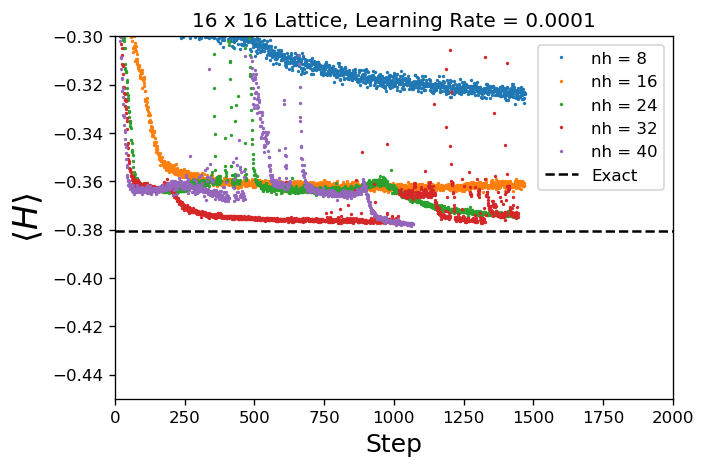

In [9]:
QMCPlot(16, 0.0001, exactE_16, E_QMC_16_8_fulldata,E_QMC_16_16_fulldata,E_QMC_16_24_fulldata,E_QMC_16_32_fulldata,E_QMC_16_40_fulldata,[0,2000],[-0.45,-0.3])




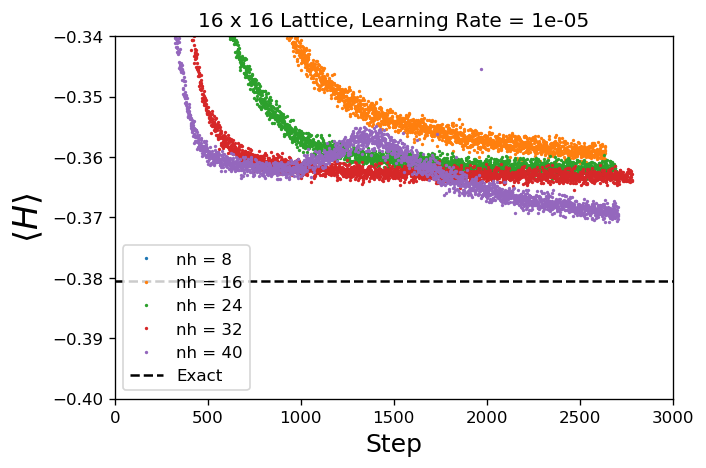

In [10]:
QMCPlot(16,0.00001,exactE_16,E_QMC_16_8_smaller,E_QMC_16_16_smaller,E_QMC_16_24_smaller,E_QMC_16_32_smaller,E_QMC_16_40_smaller,[0,3000],[-0.4,-0.34])





### Comparing VMC training VS training with QMC data

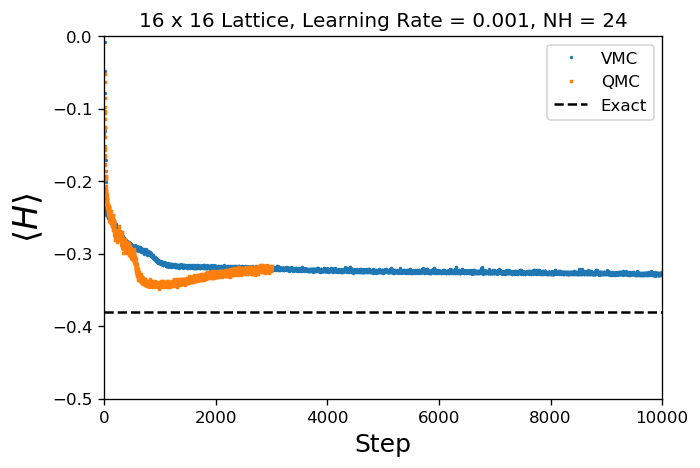

In [17]:
E_QMC_VMC_16_24 = np.zeros(len(E_QMC_16_24))
PlotE(16,0.001,24,exactE_16,E_QMC_16_24,E_VMC_16_24,E_QMC_VMC_16_24,[0,10000],[-0.5,0])

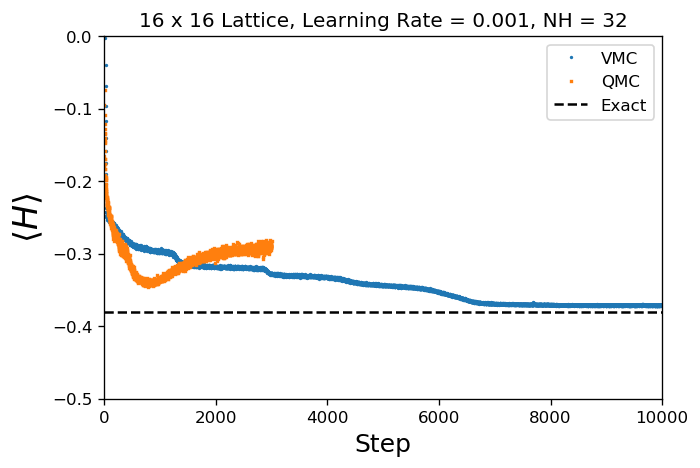

In [19]:
E_QMC_VMC_16_32 = np.zeros(len(E_QMC_16_32))
PlotE(16,0.001,32,exactE_16,E_QMC_16_32,E_VMC_16_32,E_QMC_VMC_16_32,[0,10000],[-0.5,0])

thought I messed up the VMC run, which is why there is also VMC_final, but the VMC_final looks worse than the original data (jumps in the data...) so I will leave it as the original run.

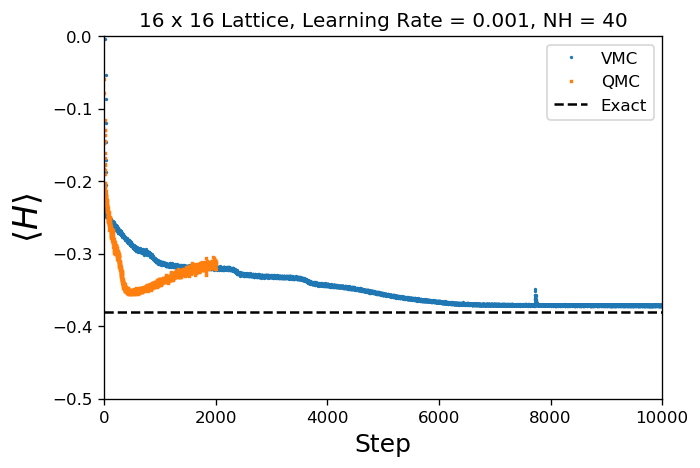

In [19]:
E_QMC_VMC_16_40 = np.zeros(len(E_QMC_16_40))
PlotE(16,0.001,40,exactE_16,E_QMC_16_40,E_VMC_16_40,E_QMC_VMC_16_40,[0,10000],[-0.5,0])

### Hybrid Method VS VMC and QMC (nh = 32)

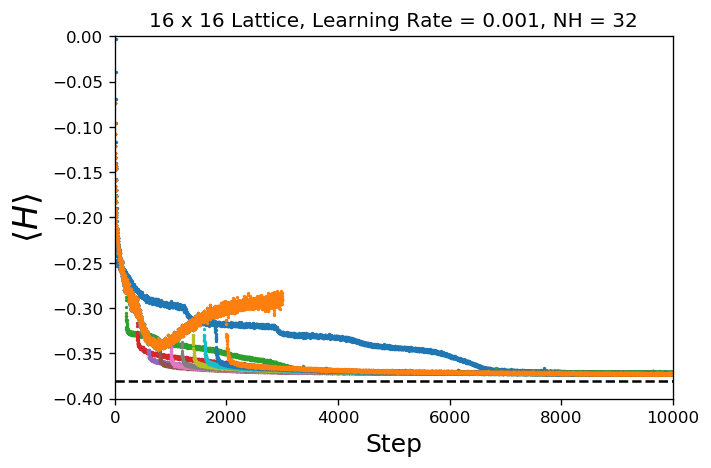

In [20]:
PlotE_hybrid(16,0.001,32,exactE_16,QMC200_VMC,QMC400_VMC,QMC600_VMC,QMC800_VMC,QMC1000_VMC,QMC1200_VMC,QMC1400_VMC,QMC1600_VMC,QMC1800_VMC,QMC2000_VMC,E_QMC_16_32,E_VMC_16_32,[0,10000],[-0.4,-0])

to get the legend, un-comment the line in the plotting function. It's just really big so I took it out (and its pretty straight forward).

### Time to Convergence

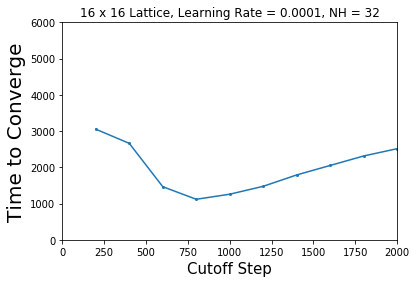

In [21]:
Plot_ConvTime(16,0.0001,32,exactE_16,QMC200_VMC,QMC400_VMC,QMC600_VMC,QMC800_VMC,QMC1000_VMC,QMC1200_VMC,QMC1400_VMC,QMC1600_VMC,QMC1800_VMC,QMC2000_VMC,0.015,[0,2000],[0,6000])



### Experiments varying number of samples

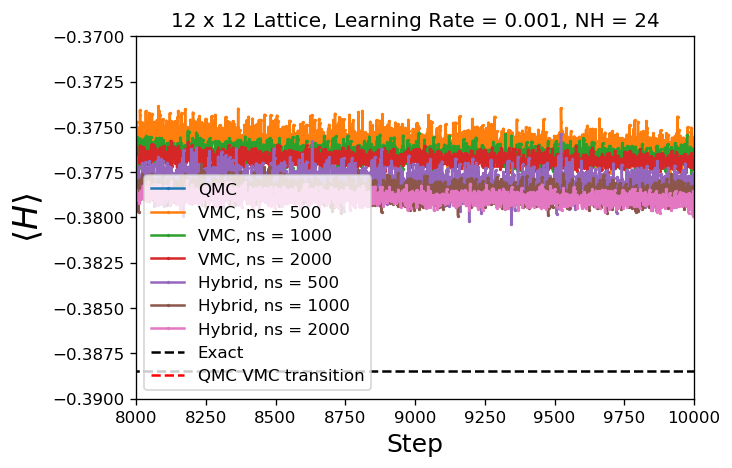

In [22]:
PlotE_samples(12,0.001,24,exactE_12,E_QMC_12_24,E_VMC_12_24_500,E_VMC_12_24_1000,E_VMC_12_24_2000,E_QMC_VMC_12_24_500,E_QMC_VMC_12_24_1000,E_QMC_VMC_12_24_2000,[8000,10000],[-0.39,-0.37])

